# CSE428 Week 3 Coding Assignment

In [ ]:
NAME = "Md. Moynul Asik Moni"
ID = "19101189"
COLLABORATORS_ID = ["", ""]

This assignment contains 4 tasks. Complete the notebook with proper codes for the lines with `# TO-BE-COMPLETED` tag, or by *uncommenting* a partially written codes where necessary.

Background: We larned in class that linear spatial filtering is basically a signal correlation opration between an image and a filter kernel. To filter an ```image``` with a ```kernel``` all we need to do is call the ```signal.correlate``` function from the ```scipy``` library.

```
filtered_image = signal.correlate(image, kernel, mode='same', method='auto')
```
Here, ```mode="same"``` takes care of the image padding under the hood; making the filtered image the *same shape* as the input image, while ```mode="valid"``` *shrinks the filtered image*. The ```method='direct'``` implements the correlation from the definition of signal correlation:

> $g(x, y)=\sum_{s,t}{w(s, t)}f(x+s, y+t)$

whereas ```method='fft'``` uses a frequency domain implementation which we will learn next week. The ```method='auto'``` chooses the faster implementation automatically. <br>
(Except for **Task 1**, always use ```method='auto'``` while using the correlation function )


 

We use the following code stucture to measure the excecution time of some python code:

```
import time

start_time = time.clock()

# some python code

print("Time elapsed: ", time.clock() - start_time, "seconds")
```


## **Task 0: The Imports** <br>
### Import the necessary libraries and define the helper functions. You can use the helper functions from the coding tutorials, or you can even use your own version of helper functions. <br>


In [ ]:
# Import libraries 

 # TO-BE-COMPLETED
 # TO-BE-COMPLETED
 # TO-BE-COMPLETED ....

from skimage import io, img_as_float
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, convolve
from skimage.color import rgb2gray
from skimage.color import gray2rgb

In [ ]:
# Define helper functions

 # TO-BE-COMPLETED
 # TO-BE-COMPLETED
 # TO-BE-COMPLETED ....

def gaussian_kernel(size, sigma):
  x = np.linspace(0, size, size)
  y = np.linspace(0, size, size)

  X, Y = np.meshgrid(x, y, sparse = True)
  gaussian = np.exp(-((X-size//2)**2+(Y-size//2)**2)/(2*(sigma**2)))
  gaussian = gaussian/(2*np.pi*(sigma**2))

  return gaussian


def sym_asym_kernel(size, sym = False):
  kernel = None

  if sym:
    l = []
    count = 1
    for i in range(1+size//2):
      l.append(count)
      count+=1
    count-=2
    for i in range(size//2):
      l.append(count)
      count-=1


    l = np.array(l)
    lt = l.reshape(size,1)
    kernel = np.multiply(l,lt)

    kernel = kernel/kernel.sum()

  else:
    kernel = np.random.rand(size,size)
    kernel = kernel/kernel.sum()

  return kernel


## **Task 1: Execution Time** <br>
### Excecution time comparison for the 2 different methods of the correlation function <br>


In [ ]:
# Import an image taken by you, make sure it's dimensions does not exceed (512, 512). Downsample if necessary.

image = io.imread('sample.jpeg') # TO-BE-COMPLETED
image = rgb2gray(image)
image = img_as_float(image)



print("Height is", image.shape[0] )
print("Width is", image.shape[1] )

Height is 333
Width is 500


In [ ]:
# Define a gaussian kernel of size (35, 35)

kernel = gaussian_kernel(35, 5) # TO-BE-COMPLETED

In [ ]:
# Determine the time to filter the image with the kernel using "direct" method

import time
 
start_time = time.clock()
 
filetred_image_direct = signal.correlate(image, kernel, mode='same', method='direct')# TO-BE-COMPLETED

 
print("Time elapsed using direct method of correlation: ", time.clock() - start_time, "seconds")

Time elapsed using direct method of correlation:  3.404482999999999 seconds


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
# Determine the time to filter the image with the kernel using "fft" method
 
start_time = time.clock()
 
filetred_image_fft = signal.correlate(image, kernel, mode='same', method='fft')  # TO-BE-COMPLETED
 
print("Time elapsed using fft method of correlation: ", time.clock() - start_time, "seconds")

Time elapsed using fft method of correlation:  0.019396000000000413 seconds


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys


### **Answer to Task 1** <br>

### Write your answer here. Comment on the results.

Result (answer): Time elapsed using direct method of correlation:  3.404482999999999 seconds and ime elapsed using fft method of correlation:  0.019396000000000413 seconds

Comment (answer):  Here the "fft" method filtering is very much faster than 'direct' method filtering. The reason behind this, the fft method filter an image via dividing the expression into two parts and calculte the first half only, then substitute these calculated values for the getting the 2nd part's result. Where direct method calulate all of the parts individually. That is why direct implementation requires much more time [ complexiety: O(N^2) ] than fft method [complexiety: O(N logN) ].


(From here onwards, please use ```method="auto"``` while using any signal function.)

## **Task 2: Correlation Vs. Convolution** <br>
### Comparing the correlation and convolution operation for different kernels<br>


(333, 500)


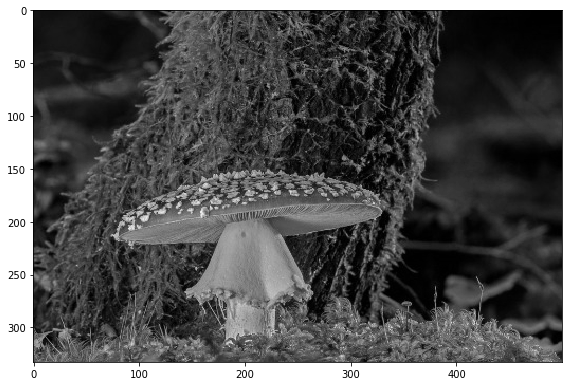

In [ ]:
# Import an image taken by you, make sure it's dimensions does not exceed (512, 512). Downsample if necessary.

image = io.imread('sample.jpeg') # TO-BE-COMPLETED




image = rgb2gray(image)
image = img_as_float(image)

print(image.shape)
plt.rcParams["figure.figsize"] = (8,8)
io.imshow(image)

In [ ]:
# Define any symmetric kernel of size (105, 105)

kernel_symmetric = sym_asym_kernel(105,True) # TO-BE-COMPLETED

print(kernel_symmetric)



[[1.26734986e-07 2.53469972e-07 3.80204958e-07 ... 3.80204958e-07
  2.53469972e-07 1.26734986e-07]
 [2.53469972e-07 5.06939944e-07 7.60409917e-07 ... 7.60409917e-07
  5.06939944e-07 2.53469972e-07]
 [3.80204958e-07 7.60409917e-07 1.14061488e-06 ... 1.14061488e-06
  7.60409917e-07 3.80204958e-07]
 ...
 [3.80204958e-07 7.60409917e-07 1.14061488e-06 ... 1.14061488e-06
  7.60409917e-07 3.80204958e-07]
 [2.53469972e-07 5.06939944e-07 7.60409917e-07 ... 7.60409917e-07
  5.06939944e-07 2.53469972e-07]
 [1.26734986e-07 2.53469972e-07 3.80204958e-07 ... 3.80204958e-07
  2.53469972e-07 1.26734986e-07]]


In [ ]:
# Define any asymmetric kernel of size (105, 105)

kernel_asymmetric = sym_asym_kernel(105) # TO-BE-COMPLETED

print(kernel_asymmetric)

[[1.08497931e-04 4.57922012e-05 1.01676969e-04 ... 2.26297333e-05
  1.03434016e-04 1.51481371e-04]
 [9.41602445e-05 7.32853977e-05 7.69918228e-05 ... 4.90046497e-05
  3.73579439e-05 1.04185051e-04]
 [1.21548340e-04 1.54277548e-04 7.52731746e-05 ... 8.20343313e-05
  1.63580547e-04 6.39401139e-05]
 ...
 [5.05808082e-05 1.29335836e-04 6.43192580e-05 ... 1.28869420e-04
  1.66276999e-04 1.75294997e-04]
 [1.07587395e-04 1.72617019e-04 3.97951489e-05 ... 1.77778108e-04
  1.79709424e-04 2.33608998e-05]
 [2.38545139e-05 1.01429583e-04 8.89260881e-05 ... 4.28575295e-05
  8.09806649e-05 4.22144948e-05]]


In [ ]:
# Filter the image with the symmetric kernel using the correlation function
    
filtered_image_symmetric = signal.correlate(image, kernel_symmetric, mode='same', method='auto') # TO-BE-COMPLETED
filtered_image_asymmetric = signal.correlate(image, kernel_asymmetric, mode='same', method='auto') # TO-BE-COMPLETED


print('filtered(correlation)_image_symmetric: ')
print(filtered_image_symmetric)
print('#############################################################################')
print('filtered(correlation)_image_asymmetric: ')
print(filtered_image_asymmetric)

filtered(correlation)_image_symmetric: 
[[0.02128728 0.02206938 0.02283657 ... 0.00238405 0.00229904 0.0022126 ]
 [0.02213268 0.02294583 0.02374346 ... 0.00258235 0.00249125 0.00239845]
 [0.02296989 0.02381376 0.0246415  ... 0.00279405 0.00269651 0.00259697]
 ...
 [0.08993532 0.09313522 0.09626225 ... 0.09464788 0.09133666 0.08800545]
 [0.08744576 0.09055514 0.09359341 ... 0.09211413 0.08889314 0.08565275]
 [0.08484166 0.08785653 0.09080211 ... 0.08945018 0.08632346 0.08317799]]
#############################################################################
filtered(correlation)_image_asymmetric: 
[[0.02305177 0.02340137 0.02377763 ... 0.00474808 0.00462528 0.00455245]
 [0.02344542 0.02379173 0.02418927 ... 0.00508504 0.00495203 0.00487771]
 [0.02381665 0.02417793 0.02456899 ... 0.00541633 0.00528854 0.00520789]
 ...
 [0.07385026 0.07480556 0.07677634 ... 0.07386078 0.07207302 0.07111178]
 [0.07304545 0.07380168 0.07552957 ... 0.07328384 0.0718699  0.07041669]
 [0.07209491 0.07324951 0.0

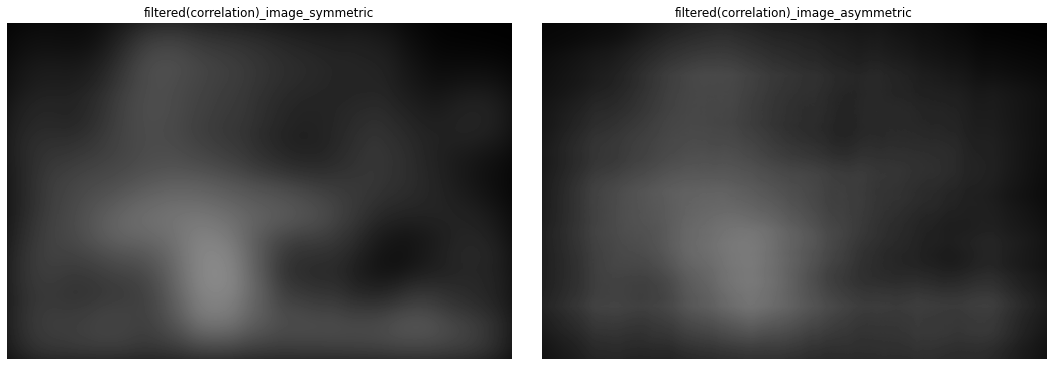

In [ ]:
# Display the images side by side (with proper labeling, which is which)

plt.rcParams["figure.figsize"] = (15,10)
plt.subplot(2, 2, 3)
plt.title('filtered(correlation)_image_symmetric')
plt.axis('off')
io.imshow(filtered_image_symmetric)



plt.subplot(2, 2, 4)
plt.title('filtered(correlation)_image_asymmetric')
plt.axis('off')
io.imshow(filtered_image_asymmetric)

### **Answer to Task 2.1** <br>

### Write your answer here. Compare the outputs.

Answer: Here both for the correlation with symmetric and asymmetric filter produces blurry image. But the symmetric filter correlation preserves more information of the actual image than the asymmetric filter correlation.

Now, to *convolve* an ```image``` with a ```kernel``` all we need to do is call the ```signal.convolve``` function from the ```scipy``` library.

```
filtered_image = signal.convolve(image, kernel, mode='same', method='auto')```

The parameters work the same way as the ```signal.correlate```function.

filtered(convolution)_image_symmetric: 
[[0.02128728 0.02206938 0.02283657 ... 0.00238405 0.00229904 0.0022126 ]
 [0.02213268 0.02294583 0.02374346 ... 0.00258235 0.00249125 0.00239845]
 [0.02296989 0.02381376 0.0246415  ... 0.00279405 0.00269651 0.00259697]
 ...
 [0.08993532 0.09313522 0.09626225 ... 0.09464788 0.09133666 0.08800545]
 [0.08744576 0.09055514 0.09359341 ... 0.09211413 0.08889314 0.08565275]
 [0.08484166 0.08785653 0.09080211 ... 0.08945018 0.08632346 0.08317799]]
#############################################################################
filtered(convolution)_image_asymmetric: 
[[0.02262128 0.02297275 0.02335077 ... 0.00482138 0.00469892 0.00460892]
 [0.02302531 0.02338636 0.02377386 ... 0.00514052 0.00501158 0.00492955]
 [0.02348658 0.0238602  0.02425272 ... 0.00547711 0.00534608 0.00525525]
 ...
 [0.07416344 0.07562762 0.07712425 ... 0.07414291 0.07281356 0.0712981 ]
 [0.07365582 0.07477666 0.07619927 ... 0.07369511 0.07261164 0.07127938]
 [0.07274874 0.07356281 0.0

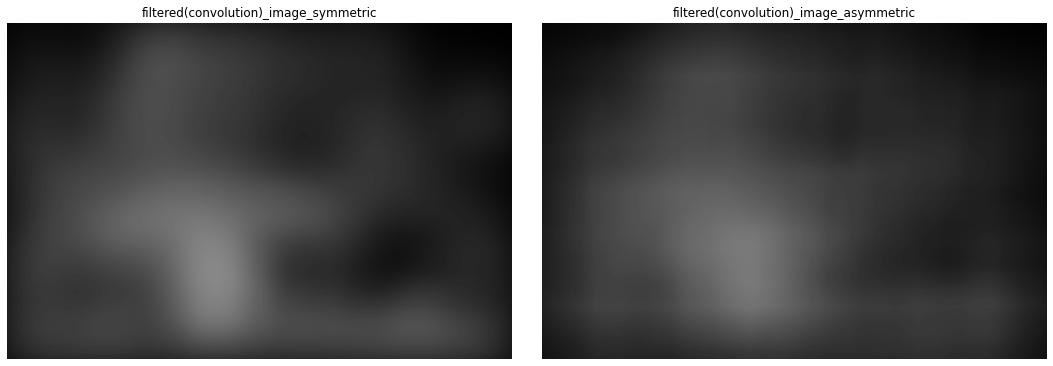

In [ ]:
# Filter the image with the asymmetric kernel using the convolution function

filtered_image_symmetric = signal.convolve(image, kernel_symmetric, mode='same', method='auto') # TO-BE-COMPLETED
filtered_image_asymmetric = signal.convolve(image, kernel_asymmetric, mode='same', method='auto') # TO-BE-COMPLETED



print('filtered(convolution)_image_symmetric: ')
print(filtered_image_symmetric)
print('#############################################################################')
print('filtered(convolution)_image_asymmetric: ')
print(filtered_image_asymmetric)

plt.rcParams["figure.figsize"] = (15,10)
plt.subplot(2, 2, 3)
plt.title('filtered(convolution)_image_symmetric')
plt.axis('off')
io.imshow(filtered_image_symmetric)



plt.subplot(2, 2, 4)
plt.title('filtered(convolution)_image_asymmetric')
plt.axis('off')
io.imshow(filtered_image_asymmetric)

### **Answer to Task 2.2** <br>

### Write your answer here. Compare the outputs.
Answer: Here the convolution with symmetric filter create identical image as like previously correlated image with same symmetric filter. All of the values same in this case. But for the asymmetric filter convolution, it results different image than same assymetric filter correlation for this image. Moreover, the symmetric filter convoluted image preserves more information of the actual image than asymmetric filter althouh both results very blurry outputs.

## **Task 3: Edge Pair Detector** <br>
### Try to come up with two 3 x 3 filter kernels which are able to detect ***only the parallel pair of edges*** in the following image<br>

![](https://drive.google.com/uc?export=view&id=1a1CXbuC8A2FbyFvZovJMXERUijpatecU)

[The image can be downloaded from here: https://drive.google.com/file/d/1a1CXbuC8A2FbyFvZovJMXERUijpatecU/view?usp=sharing]

*Hint: No mathematical derivation is necessary. Just try devising the kernels using the same intuitions used behind the horizontal and vertical edge detector kernels. Coming up with a filter kernel means to determine the 9 filter coefficients of the 3x3 filer kernel.*

In [ ]:
# Download the image from the drive link above and upload it to your current working directory in colab. Then load the image

image = io.imread('diamond2.jpg') # TO-BE-COMPLETED
image = rgb2gray(image)
image = img_as_float(image)

In [ ]:
# define the 2 custom kernels by replacing the "?"s with your values and uncomment the next few lines of code in this cell


kernel_1 = np.array([[0,1,2], # TO-BE-COMPLETED
                     [-1,0,1], # TO-BE-COMPLETED
                     [-2,-1,0]]) # TO-BE-COMPLETED

kernel_2 = np.array([ [-2,-1,0], # TO-BE-COMPLETED
                      [-1,0,1], # TO-BE-COMPLETED
                      [0,1,2]]) # TO-BE-COMPLETED

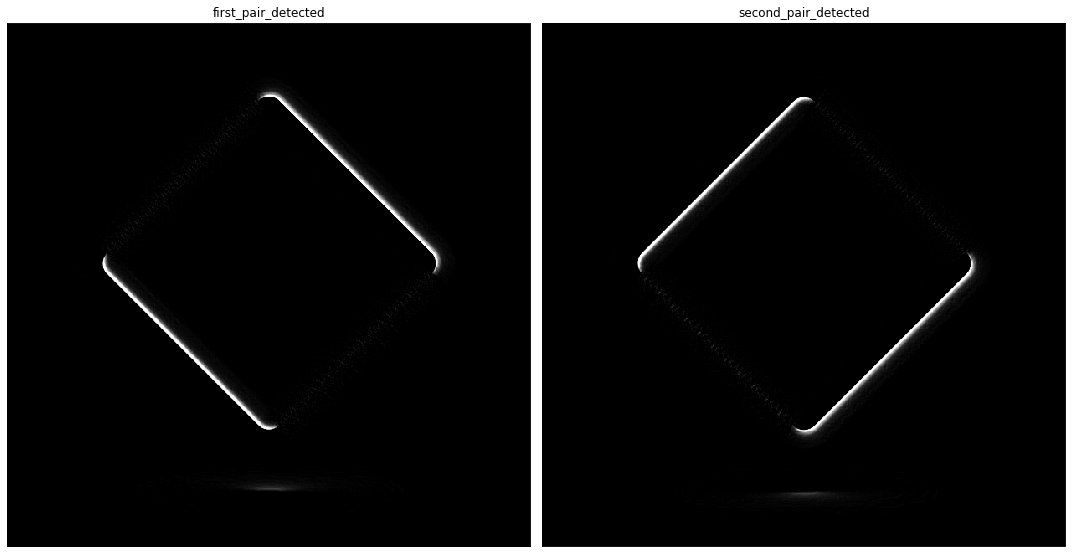

In [ ]:
# detect the 2 parallel pair of edges and plot them side by side in a 1x2 grid subplot

# detect the first pair using image filtering with kernel_1

first_pair_detected = signal.convolve(image, kernel_1, mode='same', method='auto') # TO-BE-COMPLETED

# detect the second pair using image filtering with kernel_2

second_pair_detected = signal.convolve(image, kernel_2, mode='same', method='auto') # TO-BE-COMPLETED

# plot the two filtered images side by side

# TO-BE-COMPLETED
# TO-BE-COMPLETED
# TO-BE-COMPLETED
# TO-BE-COMPLETED
# TO-BE-COMPLETED
# TO-BE-COMPLETED
# TO-BE-COMPLETED


plt.rcParams["figure.figsize"] = (15,10)
plt.subplot(1, 2, 1)
plt.title('first_pair_detected')
plt.axis('off')
io.imshow(np.clip(first_pair_detected,0,1))



plt.subplot(1, 2, 2)
plt.title('second_pair_detected')
plt.axis('off')
io.imshow(np.clip(second_pair_detected,0,1))


### **Answer to Task 3** <br>

### Write your answer here. Which filters you came up with and why? How did you choose the coefficients? Are your kernels unique or there can be other kernels which can accomplish the same task?


Answer: I came up with two 2 Sobel filter for this case beacuse here we need to techniically detect the diagonal edges. 

As I need to detect the diagonal edges so I have derived two new filters based upon the L1 norm of the gradient for coefficient calculation just like the horizontal and vertical edge detection filters such a manner so that the two opposite diagonal edges can efficiently be detected , via keeping one diagonal elememts of each of the filter zero at a time and places 1,2,1 and -1,-2,-1 coefficients for other positions of the filter in a sequeced manner.

No these kernel are not unique, there can be other kernels which can accomplish the same task. For example: Prewitt filters.

## **The END**